# **PROCESAMIENTO DE LENGUAJE NATURAL**
##**Preprocesamiento de textos**

El preprocesamiento de textos es una etapa crucial en el procesamiento del lenguaje natural (PLN) que implica la preparación y limpieza de los datos de texto antes de analizarlos o alimentarlos a un modelo. Aquí hay algunas técnicas comunes de preprocesamiento de textos:

1. **Tokenización**: Dividir el texto en unidades más pequeñas, como palabras o caracteres. Esto permite que el texto se manipule y procese más fácilmente.

2. **Eliminación de caracteres no deseados**: Eliminar caracteres especiales, signos de puntuación, números u otros caracteres que no aporten información al análisis.

3. **Minúsculas**: Convertir todas las letras a minúsculas para evitar inconsistencias debido a la capitalización.

4. **Eliminación de stopwords**: Eliminar palabras comunes que no aportan significado al análisis, como "el", "la", "de", etc.

5. **Lematización y/o stemming**: Reducir las palabras a su forma base (lema) o raíz (tronco) para reducir la variabilidad y mejorar la coherencia en el análisis.

6. **Eliminación de palabras raras o poco frecuentes**: Eliminar palabras que ocurren con poca frecuencia en el corpus de texto, ya que pueden no contribuir de manera significativa al análisis.

7. **Normalización de texto**: Realizar otras transformaciones como la eliminación de espacios adicionales, la corrección de errores tipográficos, la conversión de abreviaturas, etc.

Estas técnicas de preprocesamiento pueden aplicarse en diferentes combinaciones dependiendo de los requisitos específicos del análisis de texto y del modelo de PLN que se esté utilizando. El objetivo final del preprocesamiento es obtener un conjunto de datos de texto limpio y normalizado que pueda ser utilizado de manera efectiva en tareas de PLN.

---


Para el preprocesamiento se propone el siguiente framework:



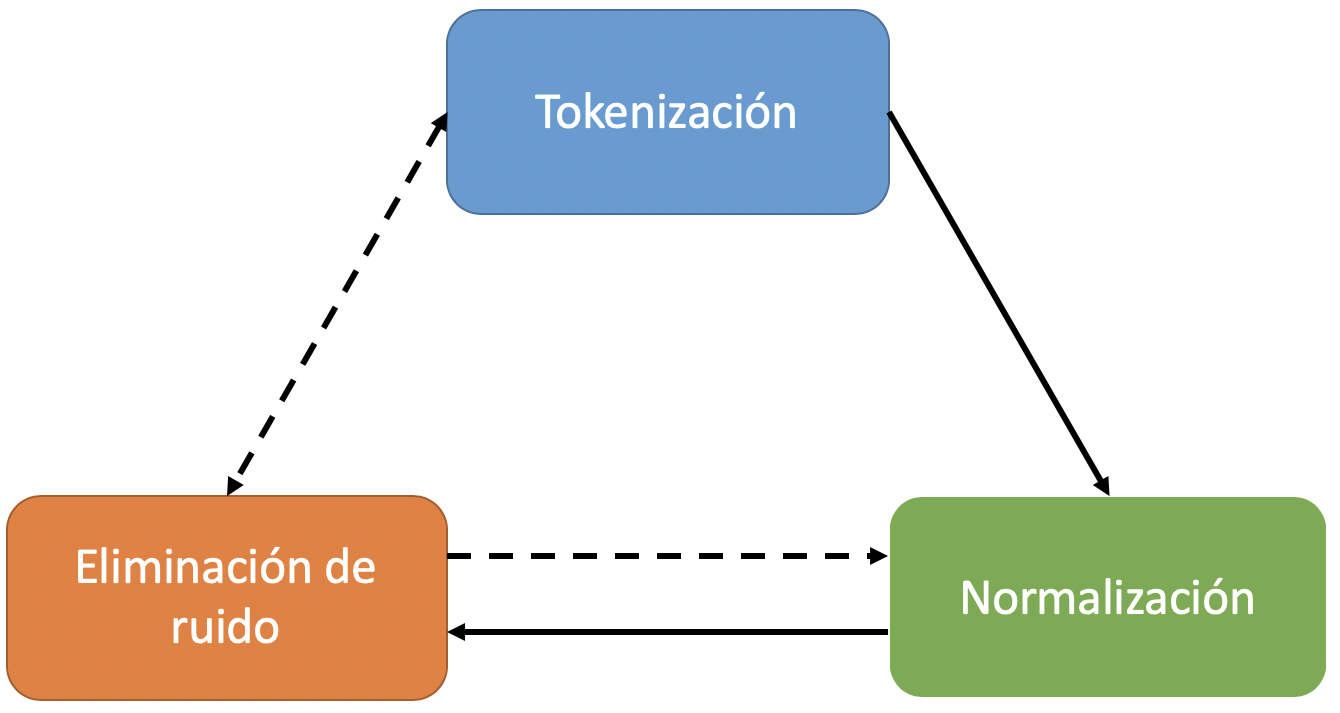


* Los pasos propuestos en este framework pueden abordarse en el orden que se quiera e incluso alguno de estas etapas no sería necesario realizarse en función de como tengamos los textos.


* Definamos a continuación lo que hay que realizar en cada uno de estos pasos:




### 1. **Eliminación de ruido**

   * Este paso tiene como objetivo eliminar todos aquellos símbolos o caracteres que no aportan nada en el significado de las frases (ojo no confundir con las stop-words), como por ejemplo etiquetas HTML (para el caso del scraping), parseos de XML, JSON, etc.
    


### 2. **Tokenización**
   * Este paso tiene como objetivo dividir las cadenas de texto del documento en piezas más pequeñas o tokens.
   * Aunque la tokenización es el proceso de dividir grandes cadenas de texto en cadenas más pequeñas, se suele diferenciar la:
       * ***Segmentation***: Tarea de dividir grandes cadenas de texto en piezas más pequeñas como oraciones o párrafos.
       * ***Tokenization***: Tarea de dividir grandes cadenas de texto solo y exclusivamente en palabras.
    

        


### 3. **Normalización**

   * La normalización es una tarea que tiene como objetivo poner todo el texto en igualdad de condiciones:
        * Convertir todo el texto en mayúscula o minúsculas
        * Eliminar, puntos, comas, comillas, etc.
        * Convertir los números a su equivalente a palabras
        * Quitar las Stop-words
        * etc.

---

### **Ejemplo de Preprocesamiento de Texto.**


* Aunque no hay una norma o guía de como realizar una normalización de texto ya que esta depende del problema a resolver y de la naturaleza del texto, vamos a mostrar a continuación algunas operaciones más o menos comúnes para la tokenización y normalización de los textos.


* Si bien este ejemplo esta hecho utilizando la librería de ***spaCy*** (ya que lo vamos a aplicar sobre un texto en Español) puede realizarse tambien con la librería de ***NLTK*** e incluso determinadas funcionalidades de tratamiento de strings lo podemos hacer con otras librerías.


* En el siguiente ejemplo vamos a tokenizar y normalizar un texto:
    1. Transformar un texto en tokens
    2. Eliminar los tokens que son signos (puntuación, exclamación, etc.)
    3. Eliminar las palabras que tienen menos de 'N' caracteres
    4. Eliminar las palabras que son Stop Words
    5. Pasar el texto a minúsculas
    6. Lematización
    
    
* **Nota**: *la normalización de texto que se va a codificar a continuación puede codificarse de forma más optimizada sin la necesidad de recorrer tantas veces la lista de tokens. Ya que este es un ejemplo con fines didácticos, este se centra en los conceptos y no en la optimización*

In [2]:
# Descargar el modelo pre-entrenado en español de spaCy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 104.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# Importar la biblioteca spaCy para el procesamiento de lenguaje natural
import spacy

# Cargar el modelo pre-entrenado en español de spaCy
nlp = spacy.load('es_core_news_sm')

# Texto sin procesar (RAW = sin procesar, en bruto)
textoRAW =  """El vicepresidente de Google Research, que despidió al ingeniero que aseguró que un algoritmo había cobrado conciencia,
                asegura que cada vez será más difícil distinguir la inteligencia de una persona de la de una computadora"""


#### Transformar un texto en tokens

In [4]:
# Función que dado un texto devuelve una lista con las palabras del texto no vacias
def get_tokens(text):
  doc = nlp(text)
  return [word.text.strip() for word in doc if len(word.text.strip()) > 0]


In [5]:
# ejemplo
tokens = get_tokens(textoRAW)
print (tokens)

['El', 'vicepresidente', 'de', 'Google', 'Research', ',', 'que', 'despidió', 'al', 'ingeniero', 'que', 'aseguró', 'que', 'un', 'algoritmo', 'había', 'cobrado', 'conciencia', ',', 'asegura', 'que', 'cada', 'vez', 'será', 'más', 'difícil', 'distinguir', 'la', 'inteligencia', 'de', 'una', 'persona', 'de', 'la', 'de', 'una', 'computadora']


#### Eliminar los tokens que son signos (puntuación, exclamación, etc.)

In [6]:
# Función que dada una lista de palabras, elimina los signos de puntuación
def remove_punctuation(words):
# Crear un objeto Doc de spaCy a partir de la lista de palabras proporcionadas
# Esto permite el procesamiento de las palabras utilizando el modelo de spaCy
  doc = spacy.tokens.doc.Doc(nlp.vocab, words=words)
  # Se filtran las palabras que son signos de puntuación
  return [word.text for word in doc if not word.is_punct]

In [7]:
# ejemplo
tokens_sin_puntuacion = remove_punctuation(tokens)
print (tokens_sin_puntuacion)

['El', 'vicepresidente', 'de', 'Google', 'Research', 'que', 'despidió', 'al', 'ingeniero', 'que', 'aseguró', 'que', 'un', 'algoritmo', 'había', 'cobrado', 'conciencia', 'asegura', 'que', 'cada', 'vez', 'será', 'más', 'difícil', 'distinguir', 'la', 'inteligencia', 'de', 'una', 'persona', 'de', 'la', 'de', 'una', 'computadora']


#### Eliminar las palabras que tienen menos de 'N' caracteres

In [8]:
# Función que dada una lista de palabras y un número mínimo de caracteres que tienen que tener las palabras,
# elimina todas las palabras que tengan menos caracteres que los indicados
def remove_short_words(words, num_chars):
  return [word for word in words if len(word) > num_chars]

In [9]:
# ejemplo
tokens_sin_palabras_cortas = remove_short_words (tokens_sin_puntuacion, 4)
print(tokens_sin_palabras_cortas)

['vicepresidente', 'Google', 'Research', 'despidió', 'ingeniero', 'aseguró', 'algoritmo', 'había', 'cobrado', 'conciencia', 'asegura', 'difícil', 'distinguir', 'inteligencia', 'persona', 'computadora']


#### Eliminar las palabras que son Stop Words

In [10]:
# Función que dada una lista de palabras, elimina las Stop Words
def remove_stop_words(words):
  # Unir las palabras en una sola cadena separada por espacios y procesarla con spaCy
  doc = nlp(" ".join(words))
  # Eliminar las palabras vacías del documento
  # Se filtran las palabras que son palabras vacías (stop words)
  return [word.text for word in doc if not word.is_stop]

In [11]:
# ejemplo
tokens_sin_stopwords = remove_stop_words(tokens_sin_palabras_cortas)
print(tokens_sin_stopwords)

['vicepresidente', 'Google', 'Research', 'despidió', 'ingeniero', 'algoritmo', 'cobrado', 'conciencia', 'asegura', 'difícil', 'distinguir', 'inteligencia', 'persona', 'computadora']


#### Pasar el texto a minúsculas

In [12]:
# Función que dada una lista de palabras, las transforma a minúsculas
def to_lowercase(words):
  return [word.lower() for word in words]

In [13]:
# ejemplo
tokens_minusculas = to_lowercase(tokens_sin_stopwords)
print (tokens_minusculas)

['vicepresidente', 'google', 'research', 'despidió', 'ingeniero', 'algoritmo', 'cobrado', 'conciencia', 'asegura', 'difícil', 'distinguir', 'inteligencia', 'persona', 'computadora']


#### Lematización

In [14]:
# Función que dada una lista de palabras, devuelve esa lista con el lema de cada una de esas palabras
def lemmatizer(words):
  # Unir las palabras en una sola cadena separada por espacios y procesarla con spaCy
  doc = nlp(" ".join(words))
  # Obtener el lema de cada palabra en el documento
  return [word.lemma_ for word in doc]

In [15]:
# ejemplo
tokens_lemas = lemmatizer(tokens_minusculas)
print (tokens_lemas)

['vicepresidente', 'google', 'research', 'despedir', 'ingeniero', 'algoritmo', 'cobrado', 'conciencia', 'asegurar', 'difícil', 'distinguir', 'inteligencia', 'persón', 'computadoro']


#### Combinando todas los pasos previos en una sola función

In [16]:
# Función que dado un texto, devuelve el texto tokenizado y normalizado
def normalize(text):
  # Tokenizar el texto y obtener una lista de palabras
  words = get_tokens(text=text)
  # Eliminar la puntuación de las palabras
  words = remove_punctuation(words=words)
  # Eliminar palabras cortas (con menos de 3 caracteres)
  words = remove_short_words(words=words, num_chars=3)
  # Eliminar palabras vacías (stop words)
  words = remove_stop_words(words)
  # Convertir todas las palabras a minúsculas
  words = to_lowercase(words)
  # Obtener el lema de cada palabra
  words = lemmatizer(words)
  # Devolver la lista de palabras normalizadas
  return words

In [17]:
# ejemplo
tokens_normalizados = normalize(textoRAW)
print(tokens_normalizados)

['vicepresidente', 'google', 'research', 'despedir', 'ingeniero', 'algoritmo', 'cobrado', 'conciencia', 'asegurar', 'difícil', 'distinguir', 'inteligencia', 'persón', 'computadoro']


#### Analizando un texto tras el Preprocesamiento
Pasamos a tokenizar y normalizar el siguiente texto usando la función de normalización realizada

In [18]:
raw = """Fernando Alonso ha vuelto a sacar petróleo de la carrera, saliendo 13º y acabando 7º un
         gran premio que ha coronado adelantando en pista a Sebastian Vettel, líder del Mundial.
         Aunque no ha querido sacar pecho por ello: "Su coche estaba tocado, tenía problemas de dirección,
         estaban en clara desventaja e iba perdiendo cada vez más, vi que en la recta iba a ser imposible
         adelantarle incluso con el DRS no conseguía pillarle así que como se abría mucho pensé que en la
         primera curva que pudiera lo intentaba por dentro y a la primera salió bien y creo que hay que
         estar contentos, séptimos otra vez, sumando puntos en las tres carreras", ha señalado."""
print(normalize(raw))

['fernando', 'alonso', 'vuelto', 'sacar', 'petróleo', 'carrera', 'salir', 'acabar', 'premio', 'coronado', 'adelantar', 'pista', 'sebastiar', 'vettel', 'líder', 'mundial', 'querido', 'sacar', 'pecho', 'coche', 'tocado', 'problema', 'dirección', 'claro', 'desventajar', 'perder', 'recta', 'imposible', 'adelantar él', 'conseguir', 'pillar él', 'abría', 'pensé', 'curvo', 'poder', 'intentar', 'salir', 'contento', 'séptimos', 'sumar', 'punto', 'carrera', 'señalado']


En este ejemplo podemos ver como reducimos las palabras (tokens) del texto original, quedandonos con lo importante y normalizado.
Pasamos de 128 tokens del texto original a 40 tokens tras la normalización

In [19]:
print('Número de tokens del texto original: ' + str(len(get_tokens(raw))))
print('Número de tokens distintos del texto original: ' + str(len(set(get_tokens(raw)))))
print('Número de tokens tras la normalización: ' + str(len(normalize(raw))))
print('Número de tokens distintos tras la normalización: ' + str(len(set(normalize(raw)))))

Número de tokens del texto original: 128
Número de tokens distintos del texto original: 91
Número de tokens tras la normalización: 43
Número de tokens distintos tras la normalización: 40
